# Implamentation d'un neurone artificiel: Classification binaire/le perceptron

## Un peu de maths:

soient $X = (X_{0}^i, X_{1}^i)_{0<=i<=n>}$ un ensemble d'observations et $y_i$ la classe de l'observation $X_i$.

On definit:
$$ z = w_{0}X_{0} + w_{1}X_{0} + b$$

Où W represente les poids attribués aux différentes variables et b un biais. touts des valeures réelles.

Soit la fonction d'activation $$f(z) = \frac{1}{1 + e^{-z}}$$

Ainsi, l'individu $X^i$ appartient à la classe 1 ssi $$f(z_i) >= seuil$$

avec $$z_i = w_{0}X_{0}^i + w_{1}X_{0}^i + b_i$$

**NB** seuil est defini à 0.5.


La methode consiste à trouver les $W_i$ et $b_i$ optimals pour le calcul du $z_i$ qui s'ajuste au mieux aux données.
Pour cela on utilise l'algorithme du **Descente de gradiant** (très populaire en machine learning) et pour trouver les valeurs optimal on maximise la log-vraisemblance.

Si on note $a_i = \frac{1}{1 + e^{-z_i}}$ et $n$ le nombre d'observation , on a :

$$L = \frac{1}{n}\sum_{i=1}^{n}{[y_i\log{(a_i)} - (1 - y_i)\log{(1 - a_i)}]}$$

$$w = w - \frac{\delta{l}}{\delta{w}}$$
 et $$b = b - \frac{\delta{l}}{\delta{b}}$$


Après calcul, on obtien la Jacobienne suivantes:

- $\frac{\delta{l}}{\delta{w_1}} = \frac{1}{n}\sum_{i=1}^{n}{a_i - y_i}x_1$

- $\frac{\delta{l}}{\delta{w_2}} = \frac{1}{n}\sum_{i=1}^{n}{a_i - y_i}x_2$

- $\frac{\delta{l}}{\delta{b}} = \frac{1}{n}\sum_{i=1}^{n}{a_i - y_i}$

## Application

### 1. Generer des données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Generate synthetic data with make_blobs
X, y = make_blobs(n_samples=1000, n_features=2 ,centers=2, random_state=0)

y = y.reshape((y.shape[0], 1))

print("dim X:", X.shape)
print("dim y:", y.shape)

dim X: (1000, 2)
dim y: (1000, 1)


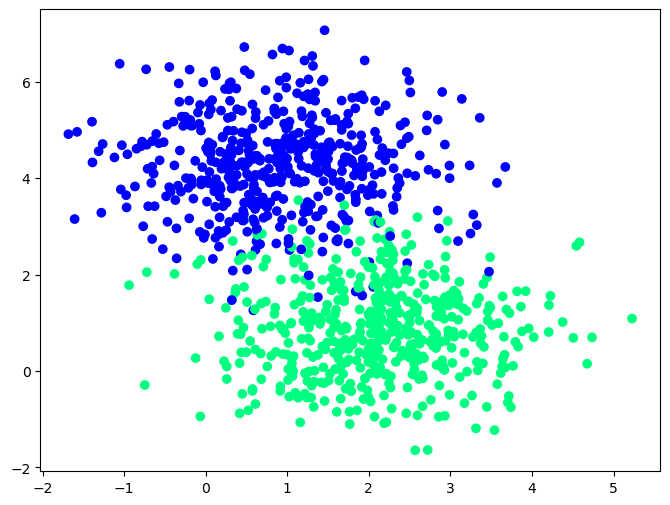

In [3]:
# Set the figure size
plt.figure(figsize=(8, 6))



plt.scatter(X[:,0], X[:,1], c=y, cmap="winter")
plt.show()

### 2. Fonction d'initialisation des paramètres W et le bruit b

In [4]:
def initialisation(x):
    W = np.random.randn(x.shape[1], 1) # w de meme dimension que la matrice x/ nbr de colonnes
    b = np.random.randn(1) #uniquement un réel
    
    return (W, b)

In [5]:
w,b = initialisation(X)

w,b

(array([[1.00885855],
        [0.37963445]]),
 array([-2.35385462]))

### 3. Definition de la fonction d'activation: la fonction logistique 

In [6]:
def f_activation(z):
    a = 1/(1 + np.exp(-z))
    
    return a

In [7]:
x0 = np.array([0.4666179 , 3.86571303])

z = x0.dot(w) + b

f_activation(z)

array([0.39758321])

### 4. definition du model: Le perceptron

In [8]:
def Mymodel(x, w, b):
    z = x.dot(w) + b
    A = f_activation(z)
    
    return A

In [9]:
A = Mymodel(X, w, b)

A.shape

(1000, 1)

- NB: la fonction marche bien, nous avons une activation pour les 1000 observations

### 5. Fonction perte "loss"

In [10]:
def f_loss(A, y):
    m = len(y)
    coef = 1/m
    errors = coef * np.sum(-y*np.log(A) - (1 - y)*np.log(1 - A))
    
    return errors

In [11]:
f_loss(A,y)

0.8438326375544477

### 6. Fonction de gradiant

In [12]:
def f_gradiant(A, x, y):
    m = len(y)
    dw = 1/m * np.dot(x.T, (A - y))
    db = 1/m / np.sum(A -y)
    
    return (dw, db)

In [13]:
f_gradiant(A, X, y)

(array([[-0.06502304],
        [ 1.00311205]]),
 3.7850384926826116e-05)

### 7. Fonction de mise à jours

In [14]:
def f_update(dw, db, w, b, alpha=0.1):
    w = w - alpha*dw
    b = b - alpha*db
    
    return (w,b)

### 8. Aprentissage fonction: neurone artificielle

In [15]:
def f_train(x, y, alpha=0.1, epoch=100):
    w,b = initialisation(x)
    
    errors = []
    for _ in range(epoch):
        A = Mymodel(x, w, b)
        errors.append(f_loss(A, y))
        dw, db = f_gradiant(A, x, y)
        w,b = f_update(dw, db, w, b, alpha)
                      
    plt.plot(errors)
    plt.show()
    return (w,b)

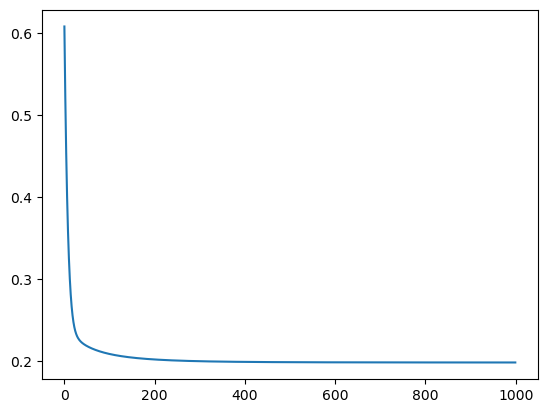

In [16]:
w,b = f_train(X, y, alpha=0.1, epoch=1000)

- **NB: On observe que l'évolution des erreures de prédiction du model décroient au fil et à mesure que celui-ci aprrend.**

### 8. definition de la fonction predict

- fonction qui prend les données brutes x, les paramètres w et b obtenues après apprentissage et renvois la classe des $x_{i}$

In [17]:
# fixé un seuil de 0.5

def f_predict(x, w, b, seuil = 0.5):    #seuil de decision
    y_proba = Mymodel(x, w, b)
    y_pred = [y_proba[i] >= seuil for i in range(len(y_proba))]
    
    return y_pred

- Predictions sur des données nouvelles

In [18]:
#generer des nouvelles données
X_tes, y_test = make_blobs(n_samples=1000, n_features=2 ,centers=2, random_state=0)


#predictions des y_i
y_pred = f_predict(X_tes, w, b, 0.5)

- **Calcul de l'exactitude de la prédiction**

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
sco = accuracy_score(y_pred, y_test)
sco

0.93

- **Remarque :** le modèle predict bien les données de test.

### 9. Tracer la frontière de décision

 $z = w_1x_1 + w_2x_2 + b$ pour $z=0$, on a: $x_2 = \frac{-w_1x_1 -b}{w_2}$

 On trace ainsi la courbe de la droite $y = \frac{-w_1x -b}{w_2}$

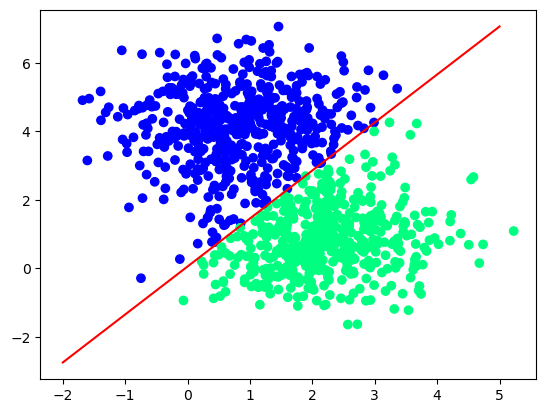

In [22]:
x0 = np.linspace(-2, 5, 400) #voir l'axe des abscisses graphique en haut
y0 = (- w[0]*x0 - b )/w[1]


plt.scatter(X_tes[:,0], X_tes[:,1], c=y_pred, cmap="winter")
plt.plot(x0, y0, "r")
plt.show()

### 10. Matrice de confusion

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [24]:
# Creation de la matrix de confusion 
conf_matrix = confusion_matrix(y_test, y_pred)

- Visualisation la matrice de confusion avec Seaborn

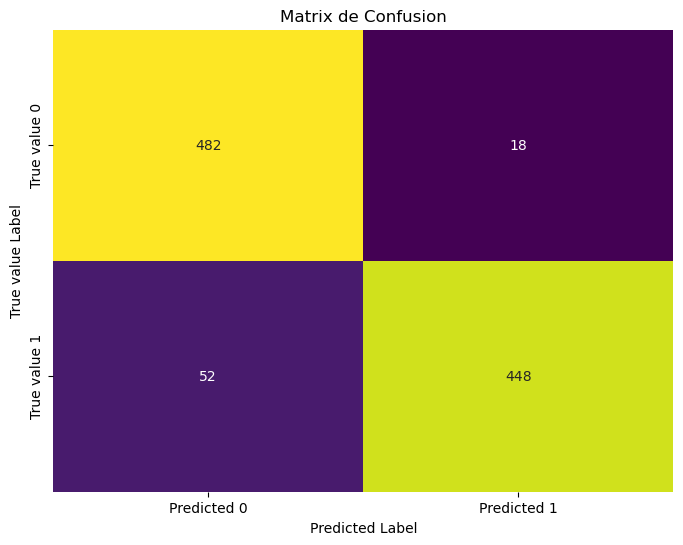

In [25]:
# Visualisation avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True value 0', 'True value 1'])
plt.title('Matrix de Confusion')
plt.xlabel('Predicted Label')
plt.ylabel('True value Label')
plt.show()

#### Lecture :

- 52 obs predits classe 0 alors qu'ils sont de la classe 1
- 18 predicts 1 alors que leurs classe est 0
- ...
- ...

**FIN**

[A Lire](https://accounts.google.com/v3/signin/confirmidentifier?authuser=0&continue=https%3A%2F%2Fmail.google.com%2Fmail%2Fu%2F0%2F%3Fpli%3D1&emr=1&followup=https%3A%2F%2Fmail.google.com%2Fmail%2Fu%2F0%2F%3Fpli%3D1&ifkv=ATuJsjyHDMVzMICr0WRtlWUp7b00RT72IEg1T2S9j_r7TE-BuQoNZff5prtZdI_-UNaE1RzJEwqc&osid=1&passive=1209600&service=mail&flowName=GlifWebSignIn&flowEntry=ServiceLogin&dsh=S1057447573%3A1708648814081592&theme=mn#inbox) Dans le prochain notebook, on verra comment le faire avec **Scikit learn**.